In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [16]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), 'ex1'))
    print(os.getcwd())
except:
	pass


 # ex1_multi - 多变量线性回归

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#引入公式包
import sys
sys.path.append('..')
from helper import formulas




In [18]:
path =  'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.describe()


,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


 ## 特征归一化。

In [19]:
data = (data - data.mean()) / data.std()
data.head()


,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


 ## 开始运行线性回归

In [20]:
# add ones column
alpha = 0.01
iters = 1000
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
# 转换为np对象,初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros([3,1]))
# 开始梯度下降
thetaOpt, cost = formulas.linearReg_gradDesc(X, y, theta, alpha, iters)
# 得到梯度下降后的代价
formulas.linearReg_cost(X, y, thetaOpt)


0.13070336960771892

 ## 看一下训练过程

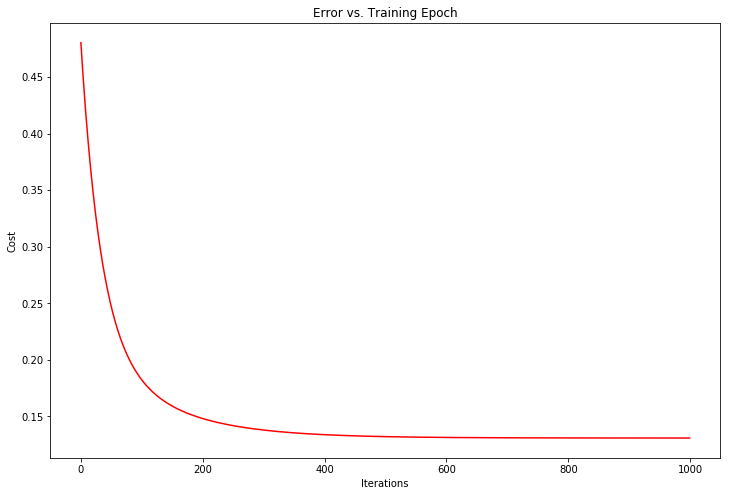

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()




 ## 正规方程
 可以看到正规方程的cost小了一点点,是真正的最优解!!!

In [22]:
thetaOpt2=formulas.normalEqn(X, y)
costLinear = formulas.linearReg_cost(X,y,thetaOpt)
costNormal = formulas.linearReg_cost(X,y,thetaOpt2)
costLinear,costNormal




(0.13070336960771892, 0.13068648053904197)

 ## 看看不同的学习率之间的区别

In [23]:
alphaArr = np.logspace(-1, -5, num=4)
# 这样处理过后就是3倍的区间了
candidate = np.sort(np.concatenate((alphaArr, alphaArr*3)))
print(candidate)



[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


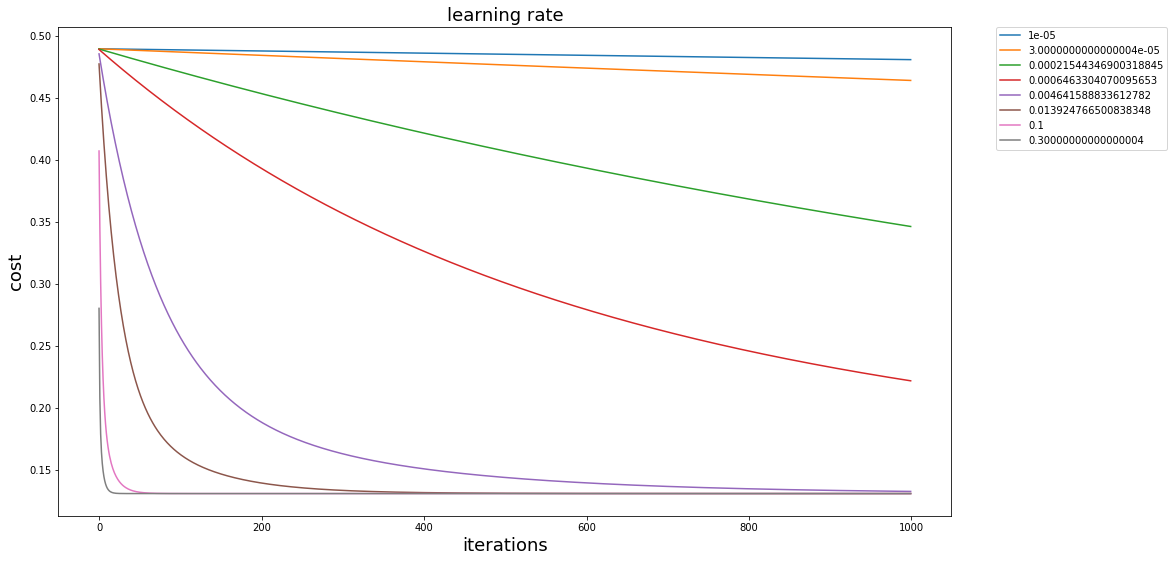

In [24]:
fig, ax = plt.subplots(figsize=(16, 9))
for alpha in candidate:
    _, cost_data = formulas.linearReg_gradDesc(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters), cost_data, label=alpha)

ax.set_xlabel('iterations', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()



In [1]:
import os
try:
    os.chdir(os.path.join(os.getcwd(), 'ex1'))
    print(os.getcwd())
except:
	pass


c:\Users\Administrator\Desktop\ml_ipynb\ex1


 # ex1_multi - 多变量线性回归

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#引入公式包
import sys
sys.path.append('..')
from helper import formulas




In [3]:
path =  'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.describe()


,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


 ## 特征归一化。

In [4]:
data = (data - data.mean()) / data.std()
data.head()


,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


 ## 开始运行线性回归

In [5]:
# add ones column
alpha = 0.01
iters = 1000
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
# 转换为np对象,初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros([3,1]))
# 开始梯度下降
thetaOpt, cost = formulas.linearReg_gradDesc(X, y, theta, alpha, iters)
# 得到梯度下降后的代价
formulas.linearReg_cost(X, y, thetaOpt)


0.13070336960771892

 ## 看一下训练过程

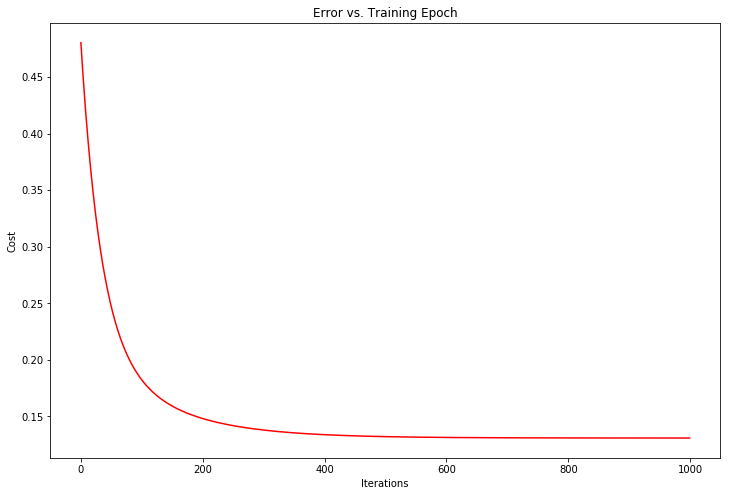

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()




 ## 正规方程
 可以看到正规方程的cost小了一点点,是真正的最优解!!!

In [7]:
thetaOpt2=formulas.normalEqn(X, y)
costLinear = formulas.linearReg_cost(X,y,thetaOpt)
costNormal = formulas.linearReg_cost(X,y,thetaOpt2)
costLinear,costNormal




(0.13070336960771892, 0.13068648053904197)

 ## 看看不同的学习率之间的区别

In [8]:
alphaArr = np.logspace(-1, -5, num=4)
# 这样处理过后就是3倍的区间了
candidate = np.sort(np.concatenate((alphaArr, alphaArr*3)))
print(candidate)



[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


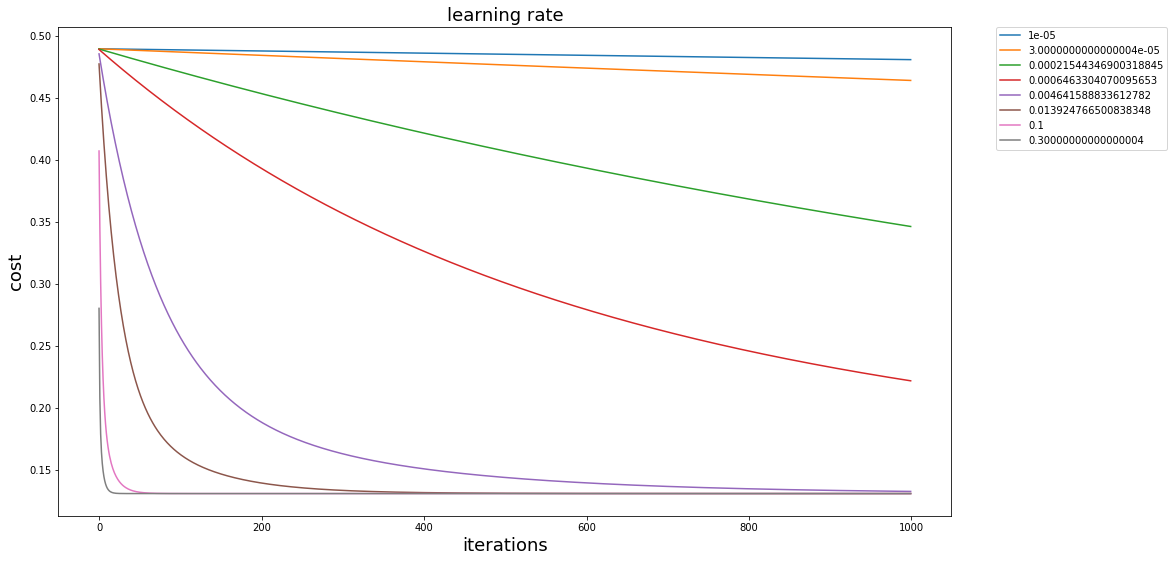

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
for alpha in candidate:
    _, cost_data = formulas.linearReg_gradDesc(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters), cost_data, label=alpha)

ax.set_xlabel('iterations', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

